In [99]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [100]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()


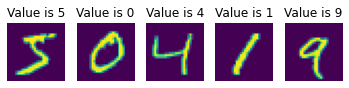

In [101]:
for i in range(5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title("Value is {}".format(y_train[i]))


In [102]:
x_train.shape
y_test[0]

7

In [103]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy,sparse_categorical_crossentropy

In [104]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [105]:

model=tf.keras.Sequential([
        Flatten(input_shape=(28,28)),
        Dense(64,activation='relu'),
        Dense(128,activation='relu'),
       Dense(10,activation=tf.nn.softmax)

  ])
model.compile(optimizer='adam',
              loss=sparse_categorical_crossentropy,
              metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3110 - accuracy: 0.9102
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1348 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0938 - accuracy: 0.9700
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0727 - accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9807
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0480 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0412 - accuracy: 0.9864
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9889
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0286 - accuracy: 0.9904
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.022

In [106]:
import pandas as pd
res_2=pd.DataFrame(history.history)
res_2['epoch']=history.epoch
res_2


,loss,accuracy,epoch
0,0.310989,0.910217,0
1,0.134807,0.958767,1
2,0.093841,0.970017,2
3,0.072721,0.977667,3
4,0.058863,0.980733,4
5,0.047995,0.984700,5
6,0.041227,0.986400,6
7,0.033537,0.988900,7
8,0.028624,0.990367,8
9,0.022944,0.992050,9


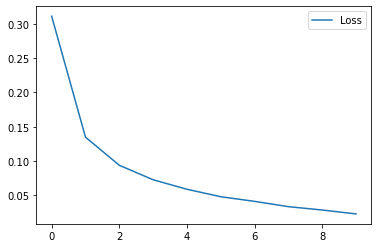

In [107]:
import matplotlib.pyplot as plt
plt.plot(res_2['epoch'],res_2['loss'])
plt.legend(["Loss"])


In [108]:
from sklearn.metrics import r2_score
predic=(model.predict(x_test))


In [109]:
y_pred=np.zeros(x_test.shape[0])
for i in range(x_test.shape[0]):

  y_pred[i]=(np.argmax(predic[i]))


In [110]:
r2=r2_score(y_test,y_pred)
print("r2_score is ",format(r2))

r2_score is  0.9275628180751362
